In [2]:
import numpy as np
import pandas as pd

#### 1. Read the demand transaction file and print the first 15 rows and dtypes

In [3]:
demandtx_df = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/12.%20Preprocessing/Demand_txn_updated.csv")

In [4]:
print(demandtx_df.head(15))

         City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0   Hyderabad         Take Away              9978        7/31/2018   
1   Hyderabad         Take Away              4064        7/31/2018   
2   Hyderabad         Main Hall               965        7/31/2018   
3   Hyderabad           Express              9978        7/31/2018   
4   Hyderabad           Express              1045        7/31/2018   
5   Hyderabad          Delivery              4056        7/31/2018   
6   Hyderabad         Take Away              4065        7/31/2018   
7   Hyderabad           Express              4058        7/31/2018   
8   Hyderabad           Express              4057        7/31/2018   
9   Hyderabad           Express              4056        7/31/2018   
10  Hyderabad          Delivery              4061        7/31/2018   
11  Hyderabad           Express              4055        7/31/2018   
12  Hyderabad         Take Away              4061        7/31/2018   
13  Hyderabad       

In [5]:
print(demandtx_df.dtypes)

City                                           object
Mapped_Sales_Type                              object
Mapped_Item_Code                                int64
Transaction_Date                               object
Quantity_Sold                                   int64
Median_Price                                  float64
Average_Tax_Percent                           float64
Effective_Price                               float64
Percent_Quantity_With_Discount                float64
Avg_Discount_Percent_On_Discounted_Items      float64
Year                                            int64
Month                                           int64
Day                                            object
Car_sales                                     float64
F_and_B_Inflation                             float64
F_and_B_Inflation_Adjusted_Effective_Price    float64
F_and_B_Inflation_Adjusted_Median_Price       float64
First_Week_Of_The_Month_Dummy                   int64
Last_Week_Of_The_Month_Dummy

#### 2. Convert the transaction date column to a date column using pd.to_datetime function

In [6]:
from datetime import datetime
demandtx_df['Transaction_Date'] = pd.to_datetime(demandtx_df['Transaction_Date'])
#print(type(demandtx_df['Transaction_Date']))
print(demandtx_df.dtypes)

City                                                  object
Mapped_Sales_Type                                     object
Mapped_Item_Code                                       int64
Transaction_Date                              datetime64[ns]
Quantity_Sold                                          int64
Median_Price                                         float64
Average_Tax_Percent                                  float64
Effective_Price                                      float64
Percent_Quantity_With_Discount                       float64
Avg_Discount_Percent_On_Discounted_Items             float64
Year                                                   int64
Month                                                  int64
Day                                                   object
Car_sales                                            float64
F_and_B_Inflation                                    float64
F_and_B_Inflation_Adjusted_Effective_Price           float64
F_and_B_Inflation_Adjust

#### 3.Subset the dataframe for transaction date greater than '2016-08-01'

In [7]:
txdate = demandtx_df[demandtx_df['Transaction_Date'] > '2016-08-01']

In [8]:
print(txdate.head())

        City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0  Hyderabad         Take Away              9978       2018-07-31   
1  Hyderabad         Take Away              4064       2018-07-31   
2  Hyderabad         Main Hall               965       2018-07-31   
3  Hyderabad           Express              9978       2018-07-31   
4  Hyderabad           Express              1045       2018-07-31   

   Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
0            167         187.0                 0.05       163.700000   
1            368         602.0                 0.05       584.329105   
2            694         263.0                 0.05       244.835163   
3            140         263.0                 0.05       243.500000   
4            139         392.0                 0.05       378.960000   

   Percent_Quantity_With_Discount  Avg_Discount_Percent_On_Discounted_Items  \
0                             NaN                                       N

#### 4. Look for unique values in Mapped_Sales_Type

In [9]:
print(demandtx_df.Mapped_Sales_Type.unique())

['Take Away' 'Main Hall' 'Express' 'Delivery' 'Dine-in' 'Bakery']


#### 5. Subset the entire dataframe, based on the below condition, to a new dataframe and work on the following questions

#### Condition : Avg_Discount_Percent_On_Discounted_Items should be less than 1.0

In [10]:
newdemand_df = demandtx_df[demandtx_df['Avg_Discount_Percent_On_Discounted_Items']<1.0]
print(newdemand_df.head())

         City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
5   Hyderabad          Delivery              4056       2018-07-31   
10  Hyderabad          Delivery              4061       2018-07-31   
20  Hyderabad           Dine-in               966       2018-07-31   
24  Hyderabad           Dine-in               965       2018-07-31   
26  Hyderabad          Delivery              4068       2018-07-31   

    Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
5             617         322.0                 0.05       305.354585   
10            144         942.0                 0.05       942.631515   
20           1250         392.0                 0.05       378.840053   
24           1934         362.0                 0.05       347.258327   
26            148         622.0                 0.05       618.898649   

    Percent_Quantity_With_Discount  Avg_Discount_Percent_On_Discounted_Items  \
5                         0.003953                          

In [11]:
print(newdemand_df[newdemand_df['Avg_Discount_Percent_On_Discounted_Items']>=1.0])

Empty DataFrame
Columns: [City, Mapped_Sales_Type, Mapped_Item_Code, Transaction_Date, Quantity_Sold, Median_Price, Average_Tax_Percent, Effective_Price, Percent_Quantity_With_Discount, Avg_Discount_Percent_On_Discounted_Items, Year, Month, Day, Car_sales, F_and_B_Inflation, F_and_B_Inflation_Adjusted_Effective_Price, F_and_B_Inflation_Adjusted_Median_Price, First_Week_Of_The_Month_Dummy, Last_Week_Of_The_Month_Dummy, Day_Of_The_Week_Seasonality, Month_Of_The_Year_Seasonality, Two_Wheeler_sales]
Index: []

[0 rows x 22 columns]


#### 6. Groupby City, Mapped_Sales_Type, Mapped_Item_Code, Transaction_Date and perform following aggregate operations on respective columns as mentioned(note: Only one groupby to do all the below aggregation
a. Quantity_Sold - sum
b. Median_Price - median
c. Effective_Price - median

In [12]:
grouped = demandtx_df.groupby(['City','Mapped_Sales_Type','Mapped_Item_Code','Transaction_Date']).aggregate({'Quantity_Sold' : 'sum','Median_Price' : 'median', 'Effective_Price' : 'median'})
print(grouped.head(10))

                                                             Quantity_Sold  \
City    Mapped_Sales_Type Mapped_Item_Code Transaction_Date                  
Chennai Bakery            4057             2017-08-05                  110   
                          9978             2018-01-22                  105   
        Delivery          4055             2017-08-04                  377   
                                           2017-08-05                  377   
                                           2017-08-06                  638   
                                           2017-08-07                  393   
                                           2017-08-08                  320   
                                           2017-08-09                  514   
                                           2017-08-10                  405   
                                           2017-08-11                  468   

                                                             Me

#### 7. Display the data for Effective_Price = not null and just print the last 5 rows (hint : use .notnull function)

In [13]:
Effectiveprice = demandtx_df[demandtx_df['Effective_Price'].notnull()]
print(Effectiveprice.tail(8))

         City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
30223  Mumbai         Main Hall               971       2016-08-01   
30224  Mumbai          Delivery              4062       2016-08-01   
30225  Mumbai         Take Away              4063       2016-08-01   
30226  Mumbai         Take Away              4056       2016-08-01   
30227  Mumbai         Take Away              4058       2016-08-01   
30228  Mumbai           Dine-in               964       2016-08-01   
30229  Mumbai         Take Away              4066       2016-08-01   
30230  Mumbai          Delivery              4061       2016-08-01   

       Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
30223            115        214.05                 0.21       214.270000   
30224            112        755.00                 0.14       824.890000   
30225            150        571.00                 0.15       614.210000   
30226            615        239.00                 0.14       232

#### 8. Display the data for city = Chennai AND Mapped_Sales_Type = Delivery and print top 5 records (hint: use loc function to subset , then "&" operator to filter the above cities

In [15]:
city = demandtx_df.loc[(demandtx_df['City'] == 'Chennai') & (demandtx_df['Mapped_Sales_Type'] == 'Delivery')]
print(city.head(5))

         City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
8379  Chennai          Delivery              4055       2018-02-05   
8384  Chennai          Delivery              4068       2018-02-05   
8387  Chennai          Delivery              4064       2018-02-05   
8388  Chennai          Delivery              4058       2018-02-05   
8392  Chennai          Delivery              4061       2018-02-05   

      Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
8379            544        281.10                 0.05       262.502194   
8384            129        566.43                 0.05       562.110000   
8387            186        619.34                 0.05       617.659733   
8388            287        259.19                 0.05       239.381307   
8392            128        850.62                 0.05       855.697647   

      Percent_Quantity_With_Discount  \
8379                             NaN   
8384                             NaN   
8387    

#### 9. Display the data for the column "Day" with values Mon, Tue and Wed (hint: use .isin function)

In [18]:
days = demandtx_df[demandtx_df['Day'].isin(['Mon','Tue','Wed'])]
print(days.head())

        City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0  Hyderabad         Take Away              9978       2018-07-31   
1  Hyderabad         Take Away              4064       2018-07-31   
2  Hyderabad         Main Hall               965       2018-07-31   
3  Hyderabad           Express              9978       2018-07-31   
4  Hyderabad           Express              1045       2018-07-31   

   Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
0            167         187.0                 0.05       163.700000   
1            368         602.0                 0.05       584.329105   
2            694         263.0                 0.05       244.835163   
3            140         263.0                 0.05       243.500000   
4            139         392.0                 0.05       378.960000   

   Percent_Quantity_With_Discount  Avg_Discount_Percent_On_Discounted_Items  \
0                             NaN                                       N

#### 10. Display the data for Percent_Quantity_With_Discount not equal to 0.0 (hint: Use loc function with != operator)

In [19]:
percentdisc = demandtx_df.loc[demandtx_df['Percent_Quantity_With_Discount'] != 0.0]
print(percentdisc.head())

        City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0  Hyderabad         Take Away              9978       2018-07-31   
1  Hyderabad         Take Away              4064       2018-07-31   
2  Hyderabad         Main Hall               965       2018-07-31   
3  Hyderabad           Express              9978       2018-07-31   
4  Hyderabad           Express              1045       2018-07-31   

   Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
0            167         187.0                 0.05       163.700000   
1            368         602.0                 0.05       584.329105   
2            694         263.0                 0.05       244.835163   
3            140         263.0                 0.05       243.500000   
4            139         392.0                 0.05       378.960000   

   Percent_Quantity_With_Discount  Avg_Discount_Percent_On_Discounted_Items  \
0                             NaN                                       N

#### 11. Add a column "Range" to the existing dataframe for below condition
a. 1 for Effective_Price > 500 
b. 0.5 otherwise

In [20]:
def range(row):
    if row['Effective_Price'] > 500:
        val = 1
    else:
        val = 0.5
    return val

In [21]:
demandtx_df['Range'] = demandtx_df.apply(range, axis=1)

In [22]:
print(demandtx_df)

            City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0      Hyderabad         Take Away              9978       2018-07-31   
1      Hyderabad         Take Away              4064       2018-07-31   
2      Hyderabad         Main Hall               965       2018-07-31   
3      Hyderabad           Express              9978       2018-07-31   
4      Hyderabad           Express              1045       2018-07-31   
...          ...               ...               ...              ...   
30226     Mumbai         Take Away              4056       2016-08-01   
30227     Mumbai         Take Away              4058       2016-08-01   
30228     Mumbai           Dine-in               964       2016-08-01   
30229     Mumbai         Take Away              4066       2016-08-01   
30230     Mumbai          Delivery              4061       2016-08-01   

       Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
0                167         187.0             

#### 12. Read the demand transaction file again and perform the following operation for practice

#### a. Handle the missing values in the column Percent_Quantity_With_Discount with strategy = mean

In [24]:
demandtx_df1 = pd.read_csv("https://raw.githubusercontent.com/Laxminarayen/Inceptez-DS-Batch20/main/12.%20Preprocessing/Demand_txn_updated.csv")

In [25]:
import seaborn as sns

F:\DS\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percent_Quantity_With_Discount'>

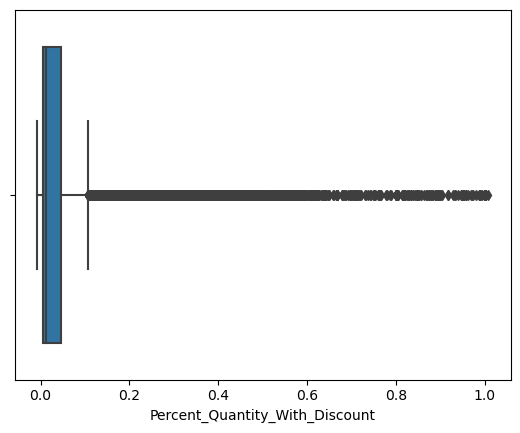

In [26]:
sns.boxplot(demandtx_df1.Percent_Quantity_With_Discount)

F:\DS\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Percent_Quantity_With_Discount', ylabel='Density'>

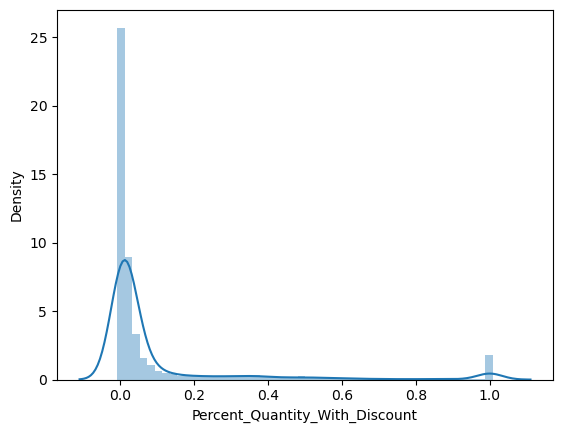

In [27]:
sns.distplot(demandtx_df1.Percent_Quantity_With_Discount)

In [29]:
demandtx_df1['Percent_Quantity_With_Discount'] = demandtx_df1['Percent_Quantity_With_Discount'].fillna(demandtx_df1['Percent_Quantity_With_Discount'].median())
print (demandtx_df1)

            City Mapped_Sales_Type  Mapped_Item_Code Transaction_Date  \
0      Hyderabad         Take Away              9978        7/31/2018   
1      Hyderabad         Take Away              4064        7/31/2018   
2      Hyderabad         Main Hall               965        7/31/2018   
3      Hyderabad           Express              9978        7/31/2018   
4      Hyderabad           Express              1045        7/31/2018   
...          ...               ...               ...              ...   
30226     Mumbai         Take Away              4056         8/1/2016   
30227     Mumbai         Take Away              4058         8/1/2016   
30228     Mumbai           Dine-in               964         8/1/2016   
30229     Mumbai         Take Away              4066         8/1/2016   
30230     Mumbai          Delivery              4061         8/1/2016   

       Quantity_Sold  Median_Price  Average_Tax_Percent  Effective_Price  \
0                167         187.0             

In [30]:
demandtx_df1['Percent_Quantity_With_Discount'].isnull().sum()

0

#### b. One hot encode the columns Mapped_Sales_Type

In [32]:
onehot = pd.get_dummies(demandtx_df1.Mapped_Sales_Type)
pd.concat([demandtx_df1,onehot], axis = 1)

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales,Bakery,Delivery,Dine-in,Express,Main Hall,Take Away
0,Hyderabad,Take Away,9978,7/31/2018,167,187.0,0.05,163.700000,0.012048,NaN,...,1,0.86,0.91,37307.52,0,0,0,0,0,1
1,Hyderabad,Take Away,4064,7/31/2018,368,602.0,0.05,584.329105,0.027237,1.050000,...,1,0.83,0.91,37307.52,0,0,0,0,0,1
2,Hyderabad,Main Hall,965,7/31/2018,694,263.0,0.05,244.835163,0.012048,NaN,...,1,1.08,1.08,37307.52,0,0,0,0,1,0
3,Hyderabad,Express,9978,7/31/2018,140,263.0,0.05,243.500000,0.012048,NaN,...,1,0.78,0.08,37307.52,0,0,0,1,0,0
4,Hyderabad,Express,1045,7/31/2018,139,392.0,0.05,378.960000,0.012048,NaN,...,1,0.73,0.08,37307.52,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30226,Mumbai,Take Away,4056,8/1/2016,615,239.0,0.14,232.033552,0.013889,0.883279,...,0,0.78,0.99,27870.40,0,0,0,0,0,1
30227,Mumbai,Take Away,4058,8/1/2016,1289,212.8,0.14,202.575840,0.009338,1.144999,...,0,0.78,0.99,27870.40,0,0,0,0,0,1
30228,Mumbai,Dine-in,964,8/1/2016,140,933.0,0.21,1063.855517,0.012048,NaN,...,0,0.77,0.94,27870.40,0,0,1,0,0,0
30229,Mumbai,Take Away,4066,8/1/2016,179,501.0,0.14,534.060000,0.012048,NaN,...,0,0.66,0.99,27870.40,0,0,0,0,0,1


#### d. Label encode the column city

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
demandtx_df1['City'] = label_encoder.fit_transform(demandtx_df1['City'])
demandtx_df1['City'].unique()

array([1, 0, 2, 3])

In [34]:
demandtx_df1

,City,Mapped_Sales_Type,Mapped_Item_Code,Transaction_Date,Quantity_Sold,Median_Price,Average_Tax_Percent,Effective_Price,Percent_Quantity_With_Discount,Avg_Discount_Percent_On_Discounted_Items,...,Day,Car_sales,F_and_B_Inflation,F_and_B_Inflation_Adjusted_Effective_Price,F_and_B_Inflation_Adjusted_Median_Price,First_Week_Of_The_Month_Dummy,Last_Week_Of_The_Month_Dummy,Day_Of_The_Week_Seasonality,Month_Of_The_Year_Seasonality,Two_Wheeler_sales
0,1,Take Away,9978,7/31/2018,167,187.0,0.05,163.700000,0.012048,NaN,...,Tue,7559.28,143.7,0.832985,0.793319,0,1,0.86,0.91,37307.52
1,1,Take Away,4064,7/31/2018,368,602.0,0.05,584.329105,0.027237,1.050000,...,Tue,7559.28,143.7,3.760119,3.681280,0,1,0.83,0.91,37307.52
2,1,Main Hall,965,7/31/2018,694,263.0,0.05,244.835163,0.012048,NaN,...,Tue,7559.28,143.7,1.397600,1.322199,0,1,1.08,1.08,37307.52
3,1,Express,9978,7/31/2018,140,263.0,0.05,243.500000,0.012048,NaN,...,Tue,7559.28,143.7,1.388309,1.322199,0,1,0.78,0.08,37307.52
4,1,Express,1045,7/31/2018,139,392.0,0.05,378.960000,0.012048,NaN,...,Tue,7559.28,143.7,2.330967,2.219903,0,1,0.73,0.08,37307.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30226,3,Take Away,4056,8/1/2016,615,239.0,0.14,232.033552,0.013889,0.883279,...,Mon,8033.92,140.1,1.342138,1.184868,1,0,0.78,0.99,27870.40
30227,3,Take Away,4058,8/1/2016,1289,212.8,0.14,202.575840,0.009338,1.144999,...,Mon,8033.92,140.1,1.131876,0.997859,1,0,0.78,0.99,27870.40
30228,3,Dine-in,964,8/1/2016,140,933.0,0.21,1063.855517,0.012048,NaN,...,Mon,8033.92,140.1,7.279483,6.138473,1,0,0.77,0.94,27870.40
30229,3,Take Away,4066,8/1/2016,179,501.0,0.14,534.060000,0.012048,NaN,...,Mon,8033.92,140.1,3.497930,3.054961,1,0,0.66,0.99,27870.40
